#Q1:Read the dataset. 

In [4]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Numerical libraries
import numpy as np
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# to handle data in form of rows and columns
import pandas as pd 
# importing plotting libraries
import matplotlib.pyplot as plt 
#importing seaborn for statistical plots
import seaborn as sns
# Importing Logistic Libraries 
from sklearn.linear_model import LogisticRegression
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing
#To import KNN Clasifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
#To Import ZScore SciPy
from scipy.stats import zscore
#Instantiate KNN Classifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
prj2_df_org = pd.read_csv("Assignment\\bank.csv")
prj2_df = prj2_df_org
prj2_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#Q2:Check info and shape of the dataset and understand the dataset 

In [7]:
prj2_df.shape

(10000, 14)

In [8]:
prj2_df.size

140000

In [9]:
prj2_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
prj2_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#There are no null values
#Geography, Gender, NumOfProducts, HasCrCard and IsActiveMember are categorical variables 
#CreditScore, Age, Tenure, Balance numerical variables

#Q3:Drop the columns which are unique for all users like IDs 

In [11]:
# RowNumber, CustomerId and Surname will not have any impact on the customer leaving the bank
#Drop these columns  as they may not be useful for the model
prj2_df = prj2_df.drop('RowNumber', axis=1)
prj2_df = prj2_df.drop('CustomerId', axis=1)
prj2_df = prj2_df.drop('Surname', axis=1)
prj2_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
prj2_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
prj2_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#Q4:Use describe function to get the summary of the data. 

In [14]:
#Describing the data
prj2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#Q5. Check value counts and encode categorical columns (Gender, Geography

In [15]:
# Split Categorical variables
prj2_df = pd.get_dummies(prj2_df, columns=['Geography'])
prj2_df = pd.get_dummies(prj2_df, columns=['Gender'])
prj2_df = pd.get_dummies(prj2_df, columns=['NumOfProducts'])
prj2_df = pd.get_dummies(prj2_df, columns=['HasCrCard'])
prj2_df

,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,1,0,0,0,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,0,1,0
2,502,42,8,159660.80,0,113931.57,1,1,0,0,1,0,0,0,1,0,0,1
3,699,39,1,0.00,0,93826.63,0,1,0,0,1,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,1,0,0,0,0,1
5,645,44,8,113755.78,0,149756.71,1,0,0,1,0,1,0,1,0,0,0,1
6,822,50,7,0.00,1,10062.80,0,1,0,0,0,1,0,1,0,0,0,1
7,376,29,4,115046.74,0,119346.88,1,0,1,0,1,0,0,0,0,1,0,1
8,501,44,4,142051.07,1,74940.50,0,1,0,0,0,1,0,1,0,0,1,0
9,684,27,2,134603.88,1,71725.73,0,1,0,0,0,1,1,0,0,0,0,1


In [16]:
prj2_df.shape

(10000, 18)

In [18]:
prj2_df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
HasCrCard_0            uint8
HasCrCard_1            uint8
dtype: object

In [20]:
prj2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Female        10000 non-null uint8
Gender_Male          10000 non-null uint8
NumOfProducts_1      10000 non-null uint8
NumOfProducts_2      10000 non-null uint8
NumOfProducts_3      10000 non-null uint8
NumOfProducts_4      10000 non-null uint8
HasCrCard_0          10000 non-null uint8
HasCrCard_1          10000 non-null uint8
dtypes: float64(2), int64(5), uint8(11)
memory usage: 654.4 KB


In [21]:
prj2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_France,10000.0,0.501400,0.500023,0.00,0.00,1.000,1.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00
Geography_Spain,10000.0,0.247700,0.431698,0.00,0.00,0.000,0.0000,1.00


#Q6. Check distribution of target column and mention your comments. 

In [22]:
# Target Column is Exited
prj2_df.groupby('Exited').count()

,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1
Exited,,,,,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


In [37]:
prj2_df.corr()

,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857,-0.014813,0.015819,-0.004145,0.002455,0.005458,-0.005458
Age,-0.003965,1.000000,-0.009997,0.028308,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544,0.072852,-0.102604,0.067365,0.050092,0.011721,-0.011721
Tenure,0.000842,-0.009997,1.000000,-0.012254,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733,-0.013423,0.012438,-0.000517,0.007716,-0.022583,0.022583
Balance,0.006268,0.028308,-0.012254,1.000000,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087,0.359646,-0.363260,-0.002722,0.021476,0.014858,-0.014858
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544,-0.022321,0.032802,-0.029864,-0.004938,0.011866,-0.011866
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112,-0.010663,0.005795,0.012153,0.006314,0.009933,-0.009933
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512,0.185447,-0.292474,0.255862,0.153612,0.007138,-0.007138
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772,-0.014049,0.026318,-0.036508,-0.002807,-0.002467,0.002467
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.020486,0.010297,0.173488,-0.580359,1.000000,-0.332084,0.024628,-0.024628,0.033878,-0.051673,0.041945,0.026720,-0.010577,0.010577
Geography_Spain,0.004780,-0.001685,0.003868,-0.134892,0.016732,-0.006482,-0.052667,-0.575418,-0.332084,1.000000,-0.016889,0.016889,-0.017750,0.021411,0.000161,-0.023583,0.013480,-0.013480


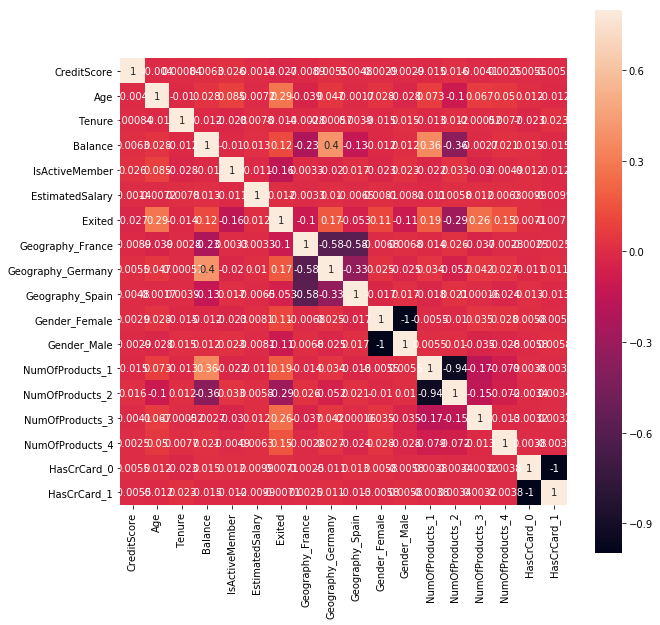

In [38]:
import seaborn as sn
correlationmat = prj2_df.corr(method='pearson')
f, ax = plt.subplots(figsize = (10,10))
sn.heatmap(correlationmat, vmax=0.8, square=True, annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


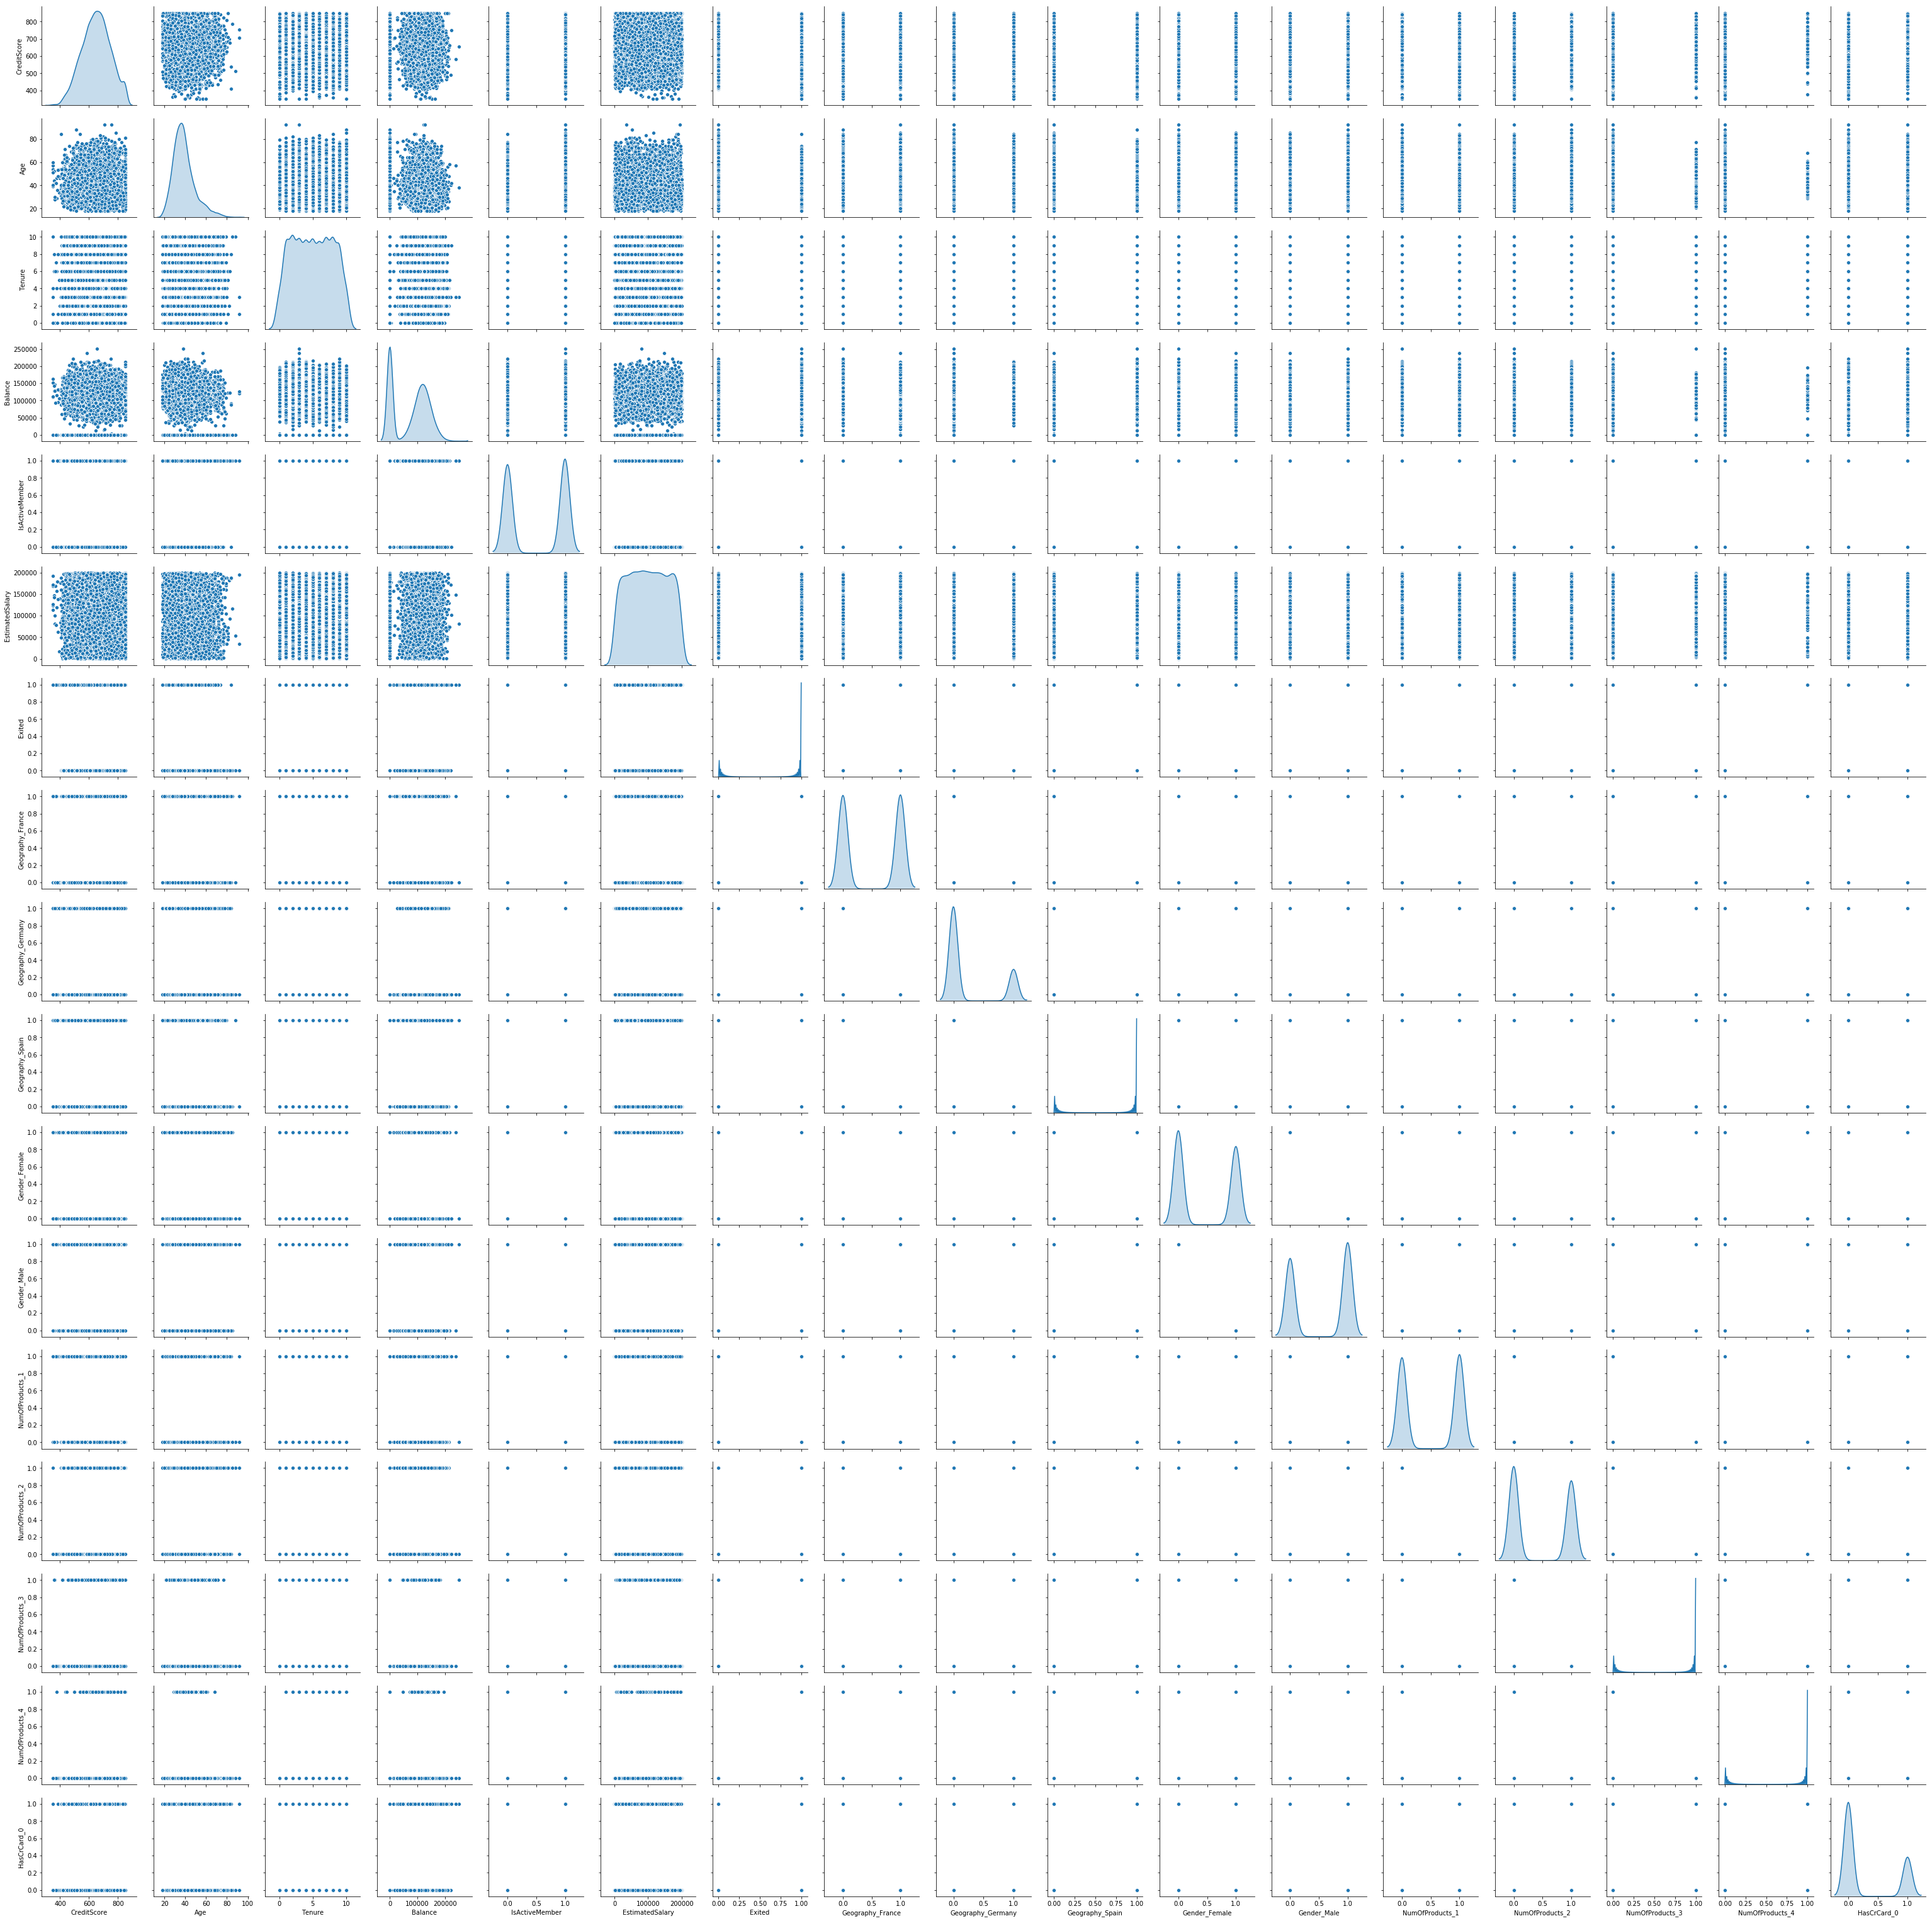

In [109]:
# The Bivariate/correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view
prj2_df_attr = prj2_df.iloc[:, 0:17]
sns.pairplot(prj2_df_attr, diag_kind='kde') # To plot density curve instead of histogram

#Target cloumn is Exited.
#1. Target Column is not having strong correlation or dependency with any other features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015D082A54A8>,
      dtype=object)

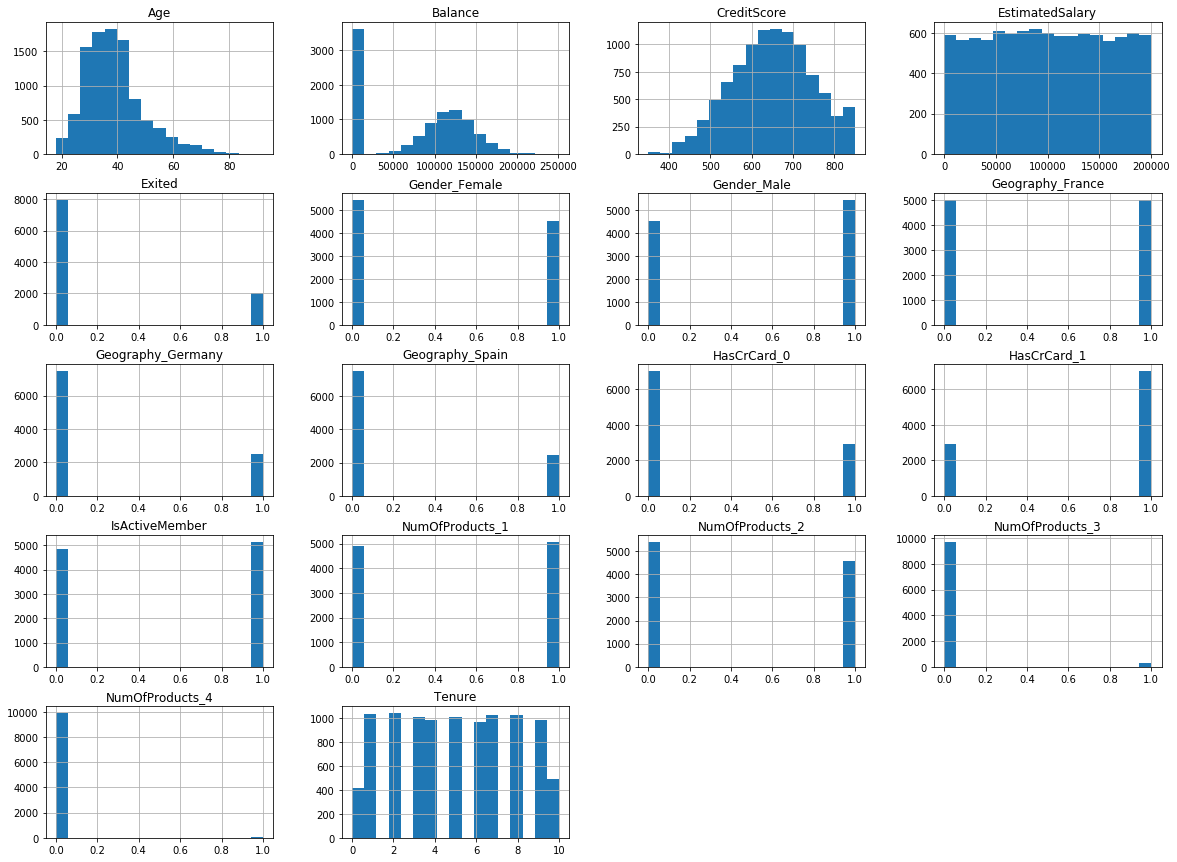

In [111]:
#Q7. Distinguish the feature and target set 
prj2_df.hist(bins=17, figsize=(20,15))

In [39]:
def DrawCountplot(prj2_df, att, hatt="N/A"):
    if(hatt == "N/A"):
        sns.countplot(x=att, data=prj2_df)
    else:
        sns.countplot(x=att, hue=hatt, data=prj2_df)
    plt.show()

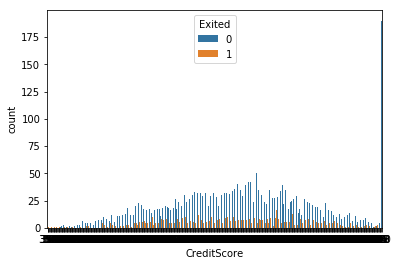

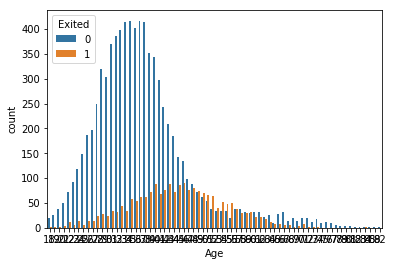

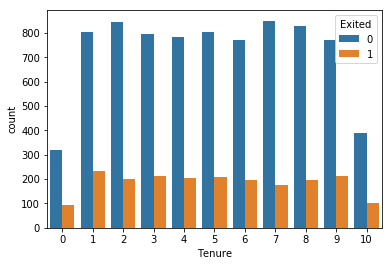

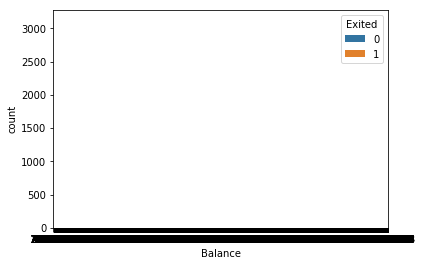

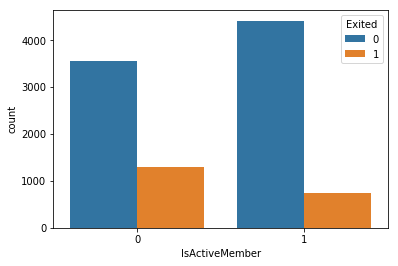

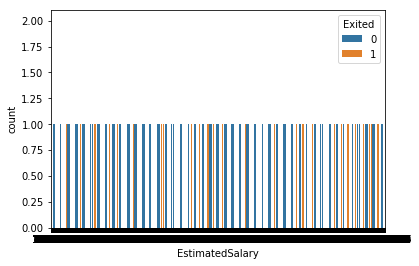

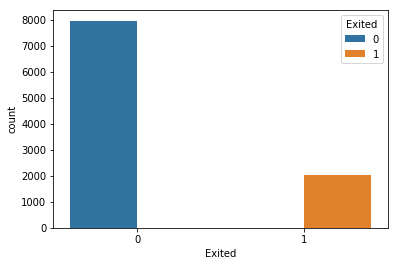

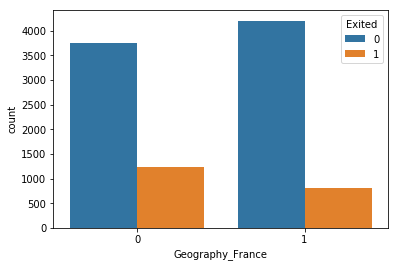

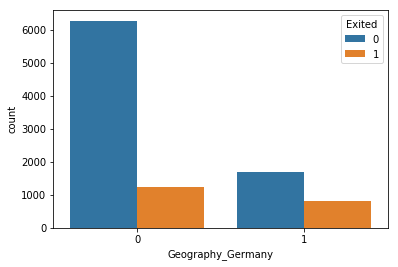

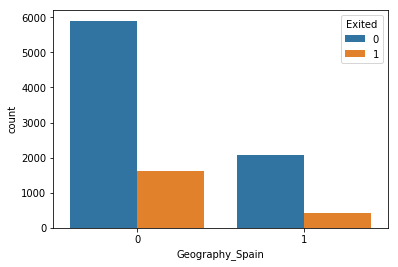

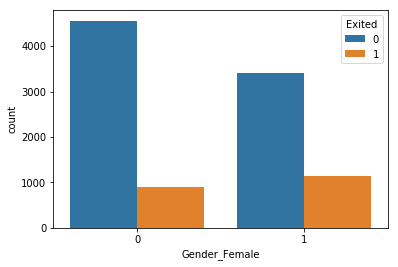

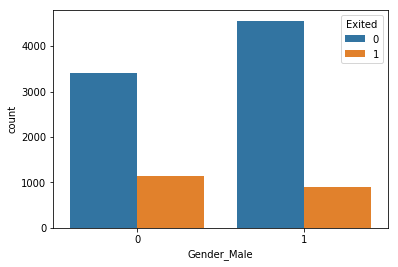

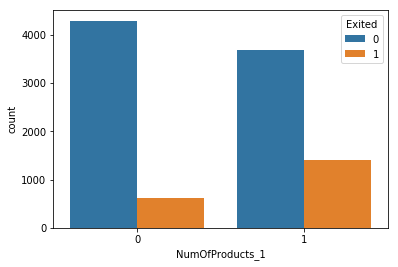

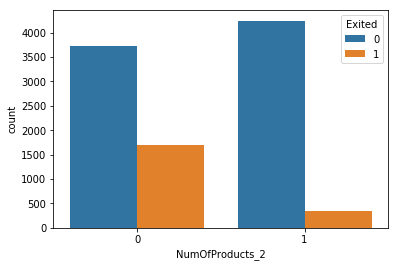

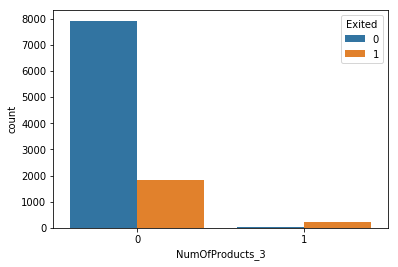

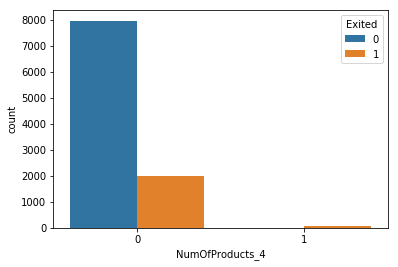

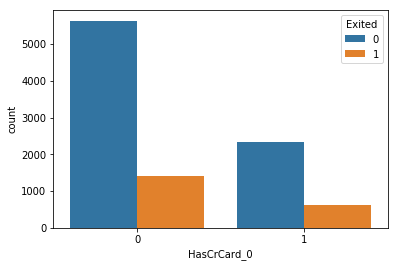

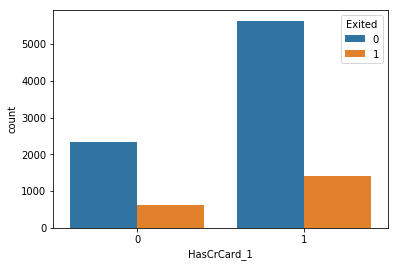

In [113]:
DrawCountplot(prj2_df, 'CreditScore', 'Exited')
DrawCountplot(prj2_df, 'Age', 'Exited')                   
DrawCountplot(prj2_df, 'Tenure', 'Exited')                 
DrawCountplot(prj2_df, 'Balance', 'Exited')              
DrawCountplot(prj2_df, 'IsActiveMember', 'Exited')         
DrawCountplot(prj2_df, 'EstimatedSalary', 'Exited')     
DrawCountplot(prj2_df, 'Exited', 'Exited')                
DrawCountplot(prj2_df, 'Geography_France','Exited') 
DrawCountplot(prj2_df, 'Geography_Germany', 'Exited')      
DrawCountplot(prj2_df, 'Geography_Spain', 'Exited')        
DrawCountplot(prj2_df, 'Gender_Female', 'Exited')          
DrawCountplot(prj2_df, 'Gender_Male', 'Exited')            
DrawCountplot(prj2_df, 'NumOfProducts_1', 'Exited')       
DrawCountplot(prj2_df, 'NumOfProducts_2', 'Exited')       
DrawCountplot(prj2_df, 'NumOfProducts_3', 'Exited')        
DrawCountplot(prj2_df, 'NumOfProducts_4', 'Exited')        
DrawCountplot(prj2_df, 'HasCrCard_0', 'Exited')            
DrawCountplot(prj2_df, 'HasCrCard_1', 'Exited')

#Geography, Gender, NumOfProducts, HasCrCard and IsActiveMember are categorical variables 
#CreditScore, Age, Tenure, Balance numerical variables
#Exited is target feature.
#Most of the data is evenly distributed.

#Q8. Divide the data set into training and test sets 

In [40]:
#Splitthe data into K and l as training and test set in 70:30 ratio.
# Copy all the predictor variables into X dataframe. And Target variable 'Personal Loan' to y
K = prj2_df.drop('Exited', axis=1)
l = prj2_df[['Exited']]
K_train, K_test, l_train, l_test = train_test_split(K,l, test_size=0.30, random_state=50)

In [41]:
K_train.shape

(7000, 17)

In [42]:
K_test.shape

(3000, 17)

In [44]:
l_train.shape

(7000, 1)

In [45]:
l_test.shape

(3000, 1)

#Q9. Standardize the train and test data 

In [46]:
bc_feature_df_z = prj2_df.apply(zscore)  # convert all attributes to Z scale ,
bc_feature_df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-4.870326e-16,1.00005,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.484679e-16,1.00005,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.400324e-16,1.00005,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-5.978551e-17,1.00005,-1.225848,-1.225848,0.331964,0.819920,2.795323
IsActiveMember,10000.0,2.164047e-16,1.00005,-1.030670,-1.030670,0.970243,0.970243,0.970243
EstimatedSalary,10000.0,-1.580958e-17,1.00005,-1.740268,-0.853594,0.001803,0.857243,1.737200
Exited,10000.0,-7.587930e-16,1.00005,-0.505775,-0.505775,-0.505775,-0.505775,1.977165
Geography_France,10000.0,7.723266e-16,1.00005,-1.002804,-1.002804,0.997204,0.997204,0.997204
Geography_Germany,10000.0,5.961232e-16,1.00005,-0.578736,-0.578736,-0.578736,1.727904,1.727904
Geography_Spain,10000.0,-1.040945e-16,1.00005,-0.573809,-0.573809,-0.573809,-0.573809,1.742740


#Q 10. Initialize kNN & build the model using Standardized data.

In [47]:
bc_feature_df=bc_feature_df_z.drop(labels="Exited", axis = 1)
bc_feature_df.head()

,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1
0,-0.326221,0.293517,-1.041760,-1.225848,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988,0.983339,-0.921102,-0.165308,-0.077693,-0.646092,0.646092
1,-0.440036,0.198164,-1.387538,0.117350,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988,0.983339,-0.921102,-0.165308,-0.077693,1.547768,-1.547768
2,-1.536794,0.293517,1.032908,1.333053,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-1.016944,-0.921102,6.049296,-0.077693,-0.646092,0.646092
3,0.501521,0.007457,-1.387538,-1.225848,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-1.016944,1.085656,-0.165308,-0.077693,1.547768,-1.547768
4,2.063884,0.388871,-1.041760,0.785728,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988,0.983339,-0.921102,-0.165308,-0.077693,-0.646092,0.646092


In [48]:
bc_feature_df.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
IsActiveMember       float64
EstimatedSalary      float64
Geography_France     float64
Geography_Germany    float64
Geography_Spain      float64
Gender_Female        float64
Gender_Male          float64
NumOfProducts_1      float64
NumOfProducts_2      float64
NumOfProducts_3      float64
NumOfProducts_4      float64
HasCrCard_0          float64
HasCrCard_1          float64
dtype: object

In [49]:
bc_labels_df=prj2_df["Exited"]
bc_labels_df.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [50]:
bc_labels_df.dtypes

dtype('int64')

In [51]:
# store the normalized features data into np array
X = np.array(bc_feature_df)
X.shape

(10000, 17)

In [52]:
# store the bc_labels data into a separate np array
y = np.array(bc_labels_df)
y.shape

(10000,)

In [56]:
# Split X and y into training and test set in 70:30 ratio,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
(X_train.shape),(X_test.shape),(y_train.shape),(y_test.shape)

((7000, 17), (3000, 17), (7000,), (3000,))

In [59]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [135]:
# be assigned to the test data point,
NNH.score(X_test, y_test)

0.831

In [136]:
# calculate accuracy measures and confusion matrix
from sklearn.metrics import classification_report
print(metrics.confusion_matrix(y_test, predicted_labels))
print('Classification Report:\n ',classification_report(y_test,predicted_labels))

[[2241  132]
 [ 375  252]]
Classification Report:
               precision    recall  f1-score   support

          0       0.86      0.94      0.90      2373
          1       0.66      0.40      0.50       627

avg / total       0.81      0.83      0.81      3000



#Q 11. Plot elbow plot for odd k values ranging from 1 to 30

1 : 79.97
3 : 82.03
5 : 83.1
7 : 83.17
9 : 84.07
11 : 84.27
13 : 84.2
15 : 84.07
17 : 83.93
19 : 84.0
21 : 84.0
23 : 83.83
25 : 83.83
27 : 84.07
29 : 84.03


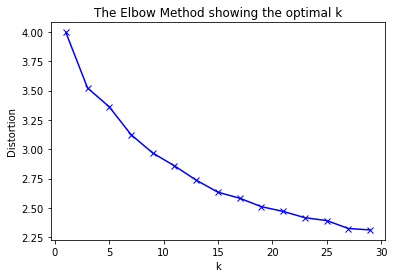

In [169]:
#Plot elbow plot for odd k values ranging from 1 to 30. 
mapping1 = {}
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(1,30,2)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    NNH = KNeighborsClassifier(n_neighbors=k , weights = 'distance' )
    NNH.fit(X_train,y_train)
    score=round(NNH.score(X_test, y_test)*100,2)
    mapping1[k] = score
for key,val in mapping1.items():
    print(str(key)+' : '+str(val)) 

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Q12. Mention your insights

#1. Observed that the Recall is less. May be dimension reduction technique or bias to be verified,
#2. When K= 11 clusters the having better performance Score: 84.27.


#Q13. Build a decision tree model check confusion metrics. 

In [172]:
# Decison Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step...."
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, presort=False, random_state=None,splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Q14. Build a logistic model and check confusion metrics. 

In [178]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)
score = round(dt_model.score(X_test, y_test)*100,2)
score

78.9

In [180]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.789


In [182]:
print(metrics.confusion_matrix(y_test, y_predict))
print('Classification Report \n',classification_report(y_test,y_predict))

[[2056  317]
 [ 316  311]]
Classification Report 
              precision    recall  f1-score   support

          0       0.87      0.87      0.87      2373
          1       0.50      0.50      0.50       627

avg / total       0.79      0.79      0.79      3000



In [183]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_predict = logistic_model.predict(X_test)
model_score = logistic_model.score(X_train, y_train)
print('Train Score is ',model_score) #model score for train data
model_score_test = logistic_model.score(X_test,y_test)
print('Test Score is ',model_score_test) # model score for test data
print('Confuson Matrix \\n',metrics.confusion_matrix(y_test, y_predict))
print('Classification Report \\n',classification_report(y_test,y_predict))

Train Score is  0.8415714285714285
Test Score is  0.84
Confuson Matrix \n [[2292   81]
 [ 399  228]]
Classification Report \n              precision    recall  f1-score   support

          0       0.85      0.97      0.91      2373
          1       0.74      0.36      0.49       627

avg / total       0.83      0.84      0.82      3000



#Q15. Document your inferences and findings

#Logistic regression got 80% accurarcy, Decison Tree got 79% accurarcy and KNN got 83% (after trying different K values by finding the optimum one)
                             Precison  Recall
      KNN            0       0.85      0.95
                     1       0.65      0.34
      Decison Tree   0       0.88      0.87  
                     1       0.49      0.51  
Logistic Regression  0       0.83      0.97  
    "                1       0.58      0.18 